# Module-24 Topic Review

Model optimization:  
- Data generation
- Penalized estimation (Lasso, Ridge regression)  
- AIC/BIC  
- Feature selection methods  

Data Science Process:  
- CRISP-DM  
- KDD  
- OSEMN  

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from numpy import random
import numpy as np

## Model optimization

### Data generation

The SciKit Learn 'datasets' module has a variety of functions useful for simulating data. 

You may want to simulate data for various reasons, troubleshooting a datapipeline or testing out a new algorithm for example. 

[`make_blobs()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) . . . creates clusters of data.  
[`make_circles()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html?highlight=make_circles#sklearn.datasets.make_circles) . . . makes circular shaped distributions.    
[`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html?highlight=make_moon#sklearn.datasets.make_moons) . . . makes moon shaped distributions.  
[`make_regression()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html?highlight=make_regression#sklearn.datasets.make_regression) . . . makes a regression line.  

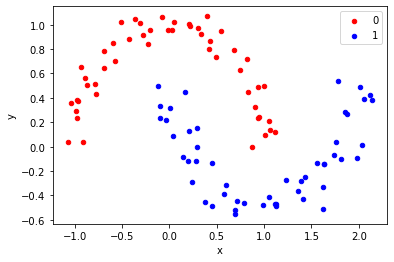

In [4]:
### A simple example of plotting generated data

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.1)

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

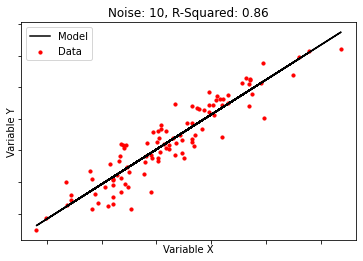

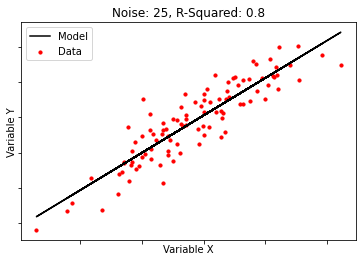

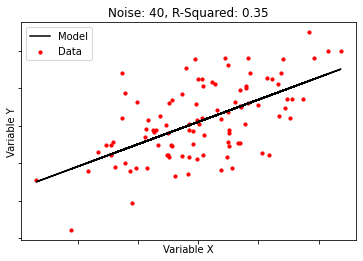

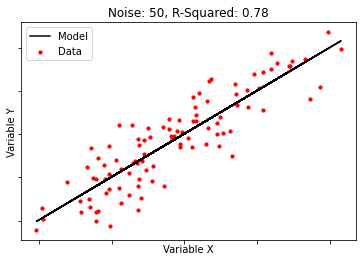

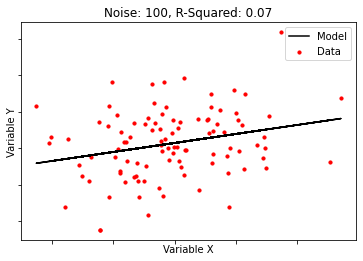

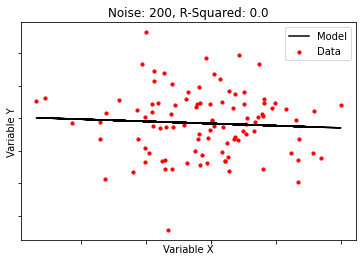

In [6]:
### A more complex example performing a OLS 
### regression analaysis on the generated data. 

# Import necessary libraries
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

def reg_simulation(n, random_state):
    # Generate X and y
    X, y = make_regression(n_samples=100, n_features=1, noise=n)

    # Use X,y to draw a scatter plot
    plt.scatter(X[:,0],y,color='red',s=10,label="Data")
    
    # Fit a linear regression model to X , y and calculate r2
    linreg = LinearRegression().fit(X,y)

    # label and plot the regression line 
    plt.plot(X[:, 0], linreg.predict(X), color='black', label='Model')
    plt.title('Noise: ' + str(n) + ', R-Squared: ' + str(round(linreg.score(X,y), 2)))
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.xlabel('Variable X')
    plt.ylabel('Variable Y')
    plt.legend()
    plt.show()


random_state = random_state = np.random.RandomState(42)

for n in [10, 25, 40, 50, 100, 200]:
    reg_simulation(n, random_state)

### Penalized Estimation

Penalized estimation refers to a variety of techniques used to reduce or elliminate some or all of the coefficients in a given model, in order to reduce overfitting, model complexity, etc. 

Both Ridge and Lasso Regression models utilize penalized estimation.

Remember the cost function (without penalization) . . .  $\sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - (mx_i + b))^2$  

A Ridge regression (*A.K.A. L2 Norm Regularization) achieves penalization by multiplying the parameter value ($m$) by a penalty term ($\lambda$) making the cost function for Ridge regression = $ \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij})-b)^2 + \lambda \sum_{j=1}^p m_j^2$  



A Lasso regression ("Least Absolute Shrinkage and Selection Operator) achieves penalization by adding the product of the penalty term and the *absolute* value of the parameter. So, the Lasso cost function = $\sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij})-b)^2 + \lambda \sum_{j=1}^p \mid m_j \mid$  

The Lasso regression is very similar to Ridge, however the difference is that Lasso can performa penalization as well as selection because Lasso may make some parameter coefficients smaller while it set others equal to exactly zero (practically eliminating the feature from the model).  
In other words where $x_i = 0$ . . . $mx_i = m_i*x_i = m_i*0 = 0$

Both of these models are available as class objects in the the [`sklearn.linear_model`](https://scikit-learn.org/stable/modules/classes.html?highlight=linear_model#module-sklearn.linear_model) module. 

### AIC & BIC

Both AIC ("Akaike's Information Criterion") and BIC("Bayesian Information Criterian") can be used to compare a candidate model against a previous model in order to select the stronger model.  

$AIC = -2\ln(\hat{L}) + 2k$  
$BIC = -2\ln(\hat{L}) + \ln(n)*k$

- $k$: length of parameter space (count of features)
- $\hat{L}$: the maximum value of the likelihood function for the model
- $n$: number of observed data points

### Feature selection methods

Feature selection can take place througha variety of processes both technical and qualitative such as: 

#### Domain knowledge

Ways to expand domain knowledge include:
- staying up to date with the literature
- communication with stake holders
- Gather expert opinions
- Listening to end-users
- mini-projects (i.e. role-play developer, end-user, etc.)

#### Wrapper Methods

Subsetting features to train a variety of models and comparing the resulting models.  
This method tends to be very computationally expensive because it requires training and testing a model for every possible subset of features.  
Some examples of wrapper functions include recursive feature elimination (RFE), and stepwise selection. 

#### Filter Methods

Filter methods select and eliminate features based on their intrinsic properties of  the feature itself and not the entire model. This reduces computational cost (when compared to wrapper methods) by reducing he amount of models that need to be trained and tested.  
Filtering is usually achieved by implementing some sort of threshold for various scores or statistics such as variance inflation factor (VIF), colinearity coefficients, etc.. 

#### Embedded Methods

Embedded feature selection methods are those that are inherent to the ML algorithm itself. As the algorithm runs it adjusts or penalizes some aspect of the feature to reduce or eliminate its impact on the model.  
An example of embedded feature selection is the Lasso and Ridge regression algorithms from above. 

## Data Science Processes

There are several methodolgies that have been standardized by the data science community to help guide a sensible and efficient workflow for data science projects.  
These are *guidelines* and not strict rules that must be followed. With any methodolgy it is common to step forwards, backwards, or even laterally between different phases.  
Strictly sticking to the order of phases is not what is important so much as being aware yourself, as well as communicating to others involved, which phase you are currently working in, in order to clarify what the current needs and goals are.  

Some examples of common methodologies are as follows . . . 

### CRISP-DM  

#### Cross Industry Standard Process for Data Mining.

<img src="images/new_crisp-dm.png" width=500>

### KDD

#### Knowledge Discovery in Databases

<img src ="images/new_kdd.png" width = 1000>

### OSEMN


<img src="images/new_osemn.png" width = 1000>